#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [ ]:
import torchvision
import torch as th
import torch.nn as nn

In [ ]:
model = torchvision.models.efficientnet_b1(
    weights=torchvision.models.EfficientNet_B1_Weights.IMAGENET1K_V1
)

In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# model.classifier[1] = nn.Linear(in_features=1280, out_features=5)

model.classifier = nn.Sequential(
    nn.Linear(in_features=1280, out_features=1024*1024),
    nn.ReLU(),
    nn.Linear(in_features=1024*1024, out_features=5),
)

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=1280, out_features=1048576, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1048576, out_features=5, bias=True)
)

In [ ]:
model.features[0][0].weight.requires_grad

True

In [ ]:
model.features[0][0].weight.requires_grad_(False)

Parameter containing:
tensor([[[[ 3.8642e-01,  1.2241e-01,  5.0212e-01],
          [ 3.4997e-01,  1.1550e-01,  3.8508e-01],
          [ 3.8387e-01,  2.2056e-01,  9.6468e-02]],

         [[ 4.0602e-01,  5.6148e-01, -2.2251e-01],
          [ 1.4863e-01,  3.9573e-01, -1.5376e-01],
          [-4.0972e-01, -2.2052e-01, -3.6777e-01]],

         [[-1.3333e-01,  2.5190e-01, -1.4265e-01],
          [-2.0382e-01,  1.1603e-01, -9.3522e-02],
          [-8.1681e-02,  3.6629e-02,  9.3803e-02]]],


        [[[-6.9058e-02,  2.8358e-01, -2.4048e-01],
          [-5.1645e-02,  6.1927e-01, -5.3088e-01],
          [-1.1722e-02,  2.8499e-01, -3.0543e-01]],

         [[-3.0572e-02,  4.9295e-01, -4.7230e-01],
          [-3.8374e-02,  1.0284e+00, -9.7627e-01],
          [ 3.5327e-02,  4.7342e-01, -4.9546e-01]],

         [[-3.1007e-02,  1.1951e-01, -7.2655e-02],
          [-7.1973e-02,  3.3143e-01, -2.7283e-01],
          [ 2.4259e-02,  8.3443e-02, -1.4971e-01]]],


        [[[ 2.0461e-01, -6.1518e-02,  9.1279

In [ ]:
model.features[0][0].weight.requires_grad

False

In [ ]:
for name, param in model.named_parameters():
  print(name)
  if name.startswith("features"):
    param.requires_grad_(False)
  break

features.0.0.weight


In [ ]:
images = th.randint(0, 255, (16, 3, 500, 500)).float()

In [ ]:
out = model(images)

In [ ]:
out.shape

In [ ]:
t = torchvision.models.EfficientNet_B1_Weights.IMAGENET1K_V1.transforms()
t

In [ ]:
images_t = t(images)
images_t.shape

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [x] Проверено на семинаре

In [ ]:
from torchvision.models import vgg16
import torchvision.models as models
import torchvision.transforms.v2 as T
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
model = vgg16(weights='IMAGENET1K_V1').cuda()

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
len(model.classifier) + len(model.features) + 1 #avgpool

39

In [ ]:
import numpy as np

In [ ]:
sum(p.numel() for p in model.parameters() if p.requires_grad==True)

138357544

<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [ ] Проверено на семинаре

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/cat_breeds_4.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()

In [ ]:
data_way = ImageFolder('/content/cat_breeds_4')

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

test_transform = transforms.Compose([models.VGG16_Weights.IMAGENET1K_V1.transforms()])

In [ ]:
train_dataset, test_dataset = random_split(data_way, [0.8, 0.2])

In [ ]:
train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = test_transform

In [ ]:
len(train_dataset)

3200

In [ ]:
len(test_dataset)

800

<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
#Заморозьте все веса модели из предыдущего задания
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.classifier[-1] = nn.Linear(4096, 4)
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=4, bias=True)
)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier[-1].parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Переключаем модель в режим обучения
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} train: Loss: {epoch_loss} Acc: {epoch_acc}')

    # Валидация модели
    model.eval()  # Переключаем модель в режим оценки
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = running_corrects.double() / len(test_loader.dataset)

    val_loss_history.append(epoch_loss)
    val_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} val: Loss: {epoch_loss} Acc: {epoch_acc}')

Epoch 1/10 train: Loss: 0.7828664809465409 Acc: 0.673125
Epoch 1/10 val: Loss: 0.5980269527435302 Acc: 0.7625000000000001
Epoch 2/10 train: Loss: 0.5909617668390275 Acc: 0.76125
Epoch 2/10 val: Loss: 0.5855741143226624 Acc: 0.76875
Epoch 3/10 train: Loss: 0.5406824666261673 Acc: 0.784375
Epoch 3/10 val: Loss: 0.5637026190757751 Acc: 0.765
Epoch 4/10 train: Loss: 0.5272070497274399 Acc: 0.7853125
Epoch 4/10 val: Loss: 0.5519672775268555 Acc: 0.785
Epoch 5/10 train: Loss: 0.5201281744241715 Acc: 0.7884375
Epoch 5/10 val: Loss: 0.5320329713821411 Acc: 0.7837500000000001
Epoch 6/10 train: Loss: 0.5113832968473434 Acc: 0.79625
Epoch 6/10 val: Loss: 0.5674865126609803 Acc: 0.77625
Epoch 7/10 train: Loss: 0.4918042606115341 Acc: 0.80125
Epoch 7/10 val: Loss: 0.5303047275543213 Acc: 0.76875
Epoch 8/10 train: Loss: 0.47678902685642244 Acc: 0.8090625
Epoch 8/10 val: Loss: 0.5210399174690247 Acc: 0.7837500000000001
Epoch 9/10 train: Loss: 0.487499817609787 Acc: 0.8093750000000001
Epoch 9/10 val: 

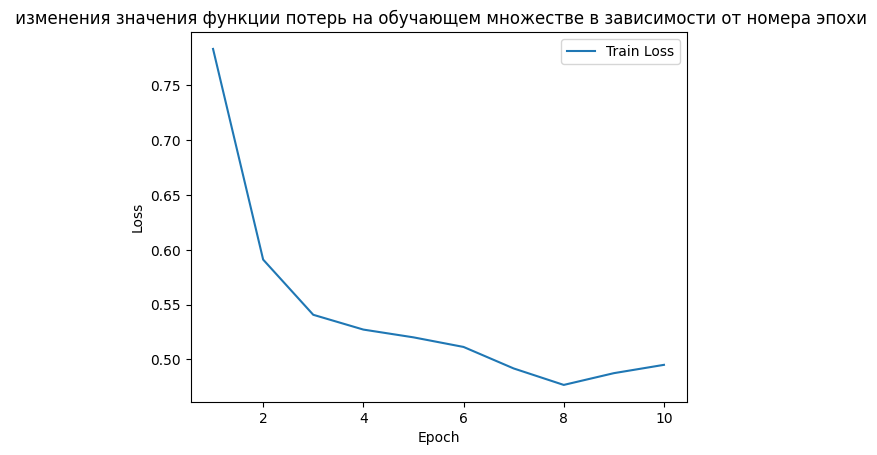

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(' изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи')
plt.show()

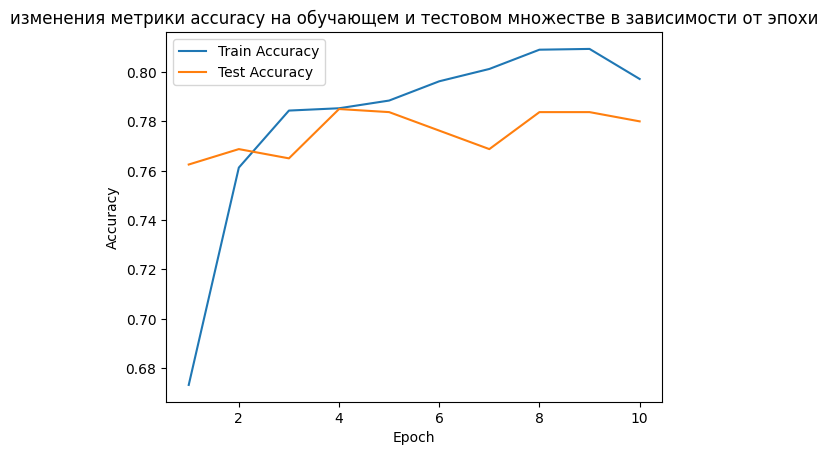

In [ ]:
# Перемещение тензоров на CPU для построения графика
train_acc_cpu = [acc.cpu().numpy() for acc in train_acc_history]
val_acc_cpu = [acc.cpu().numpy() for acc in val_acc_history]


plt.figure()
plt.plot(range(1, num_epochs + 1), train_acc_cpu, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_acc_cpu, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи')
plt.show()


In [ ]:
final_train_accuracy = train_acc_history[-1]
final_test_accuracy = val_acc_history[-1]
print(f'Final Train Accuracy: {final_train_accuracy:.4f}')
print(f'Final Test Accuracy: {final_test_accuracy:.4f}')

Final Train Accuracy: 0.7972
Final Test Accuracy: 0.7800


## Я поздно заметил, что в 4 задании просилось замерить время, в 3 и 4 задании скорость выполнения была около 6-7 минут на gpu, сейчас коллаб не дает доступ к нему. Модель в 4 задании работала чуть подольше тк, заморожены не все веса.

<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей.

- [ ] Проверено на семинаре

In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

features.0.weight False
features.0.bias False
features.2.weight False
features.2.bias False
features.5.weight False
features.5.bias False
features.7.weight False
features.7.bias False
features.10.weight False
features.10.bias False
features.12.weight False
features.12.bias False
features.14.weight False
features.14.bias False
features.17.weight False
features.17.bias False
features.19.weight False
features.19.bias False
features.21.weight False
features.21.bias False
features.24.weight False
features.24.bias False
features.26.weight False
features.26.bias False
features.28.weight False
features.28.bias False
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [ ]:
# Замораживаем все сверточные слои, кроме последнего
for name, param in model.named_parameters():
    if "classifier" not in name:
        param.requires_grad = False

# Перемещаем модель на устройство
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Создаем оптимизатор только для параметров, у которых requires_grad=True
optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, momentum=0.9)

In [ ]:
train_loss_history = []
train_acc_history = []

val_loss_history = []
val_acc_history = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Переключаем модель в режим обучения
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} train: Loss: {epoch_loss} Acc: {epoch_acc}')

    # Валидация модели
    model.eval()  # Переключаем модель в режим оценки
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = running_corrects.double() / len(test_loader.dataset)

    val_loss_history.append(epoch_loss)
    val_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} val: Loss: {epoch_loss} Acc: {epoch_acc}')

Epoch 1/10 train: Loss: 0.7441405856609344 Acc: 0.6921875000000001
Epoch 1/10 val: Loss: 0.566773977279663 Acc: 0.76375
Epoch 2/10 train: Loss: 0.5239626139402389 Acc: 0.788125
Epoch 2/10 val: Loss: 0.5597928071022034 Acc: 0.77875
Epoch 3/10 train: Loss: 0.4571886932849884 Acc: 0.8184375
Epoch 3/10 val: Loss: 0.5244036912918091 Acc: 0.78
Epoch 4/10 train: Loss: 0.41764752626419066 Acc: 0.833125
Epoch 4/10 val: Loss: 0.5114340949058532 Acc: 0.78625
Epoch 5/10 train: Loss: 0.370455276966095 Acc: 0.851875
Epoch 5/10 val: Loss: 0.5355128479003907 Acc: 0.7975
Epoch 6/10 train: Loss: 0.3470769900083542 Acc: 0.865625
Epoch 6/10 val: Loss: 0.5092990946769714 Acc: 0.795
Epoch 7/10 train: Loss: 0.3043001240491867 Acc: 0.8853125000000001
Epoch 7/10 val: Loss: 0.5481821298599243 Acc: 0.7887500000000001
Epoch 8/10 train: Loss: 0.2705965569615364 Acc: 0.9003125000000001
Epoch 8/10 val: Loss: 0.517364616394043 Acc: 0.785
Epoch 9/10 train: Loss: 0.2437296661734581 Acc: 0.90625
Epoch 9/10 val: Loss: 0.

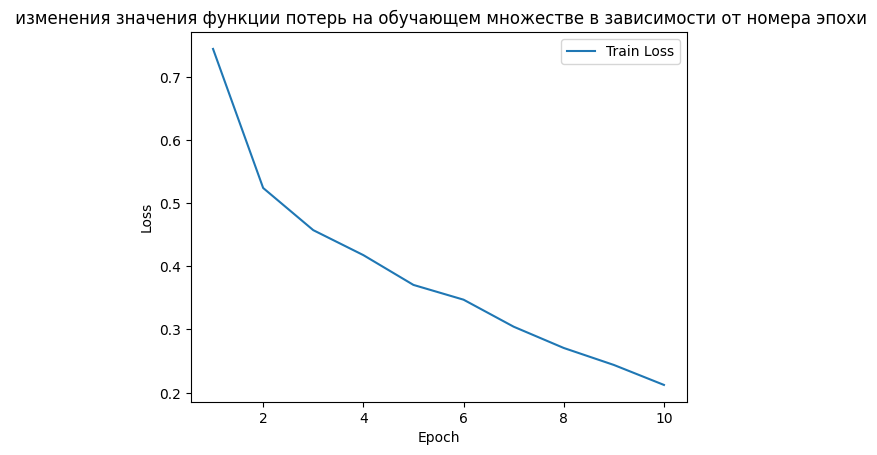

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(' изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи')
plt.show()

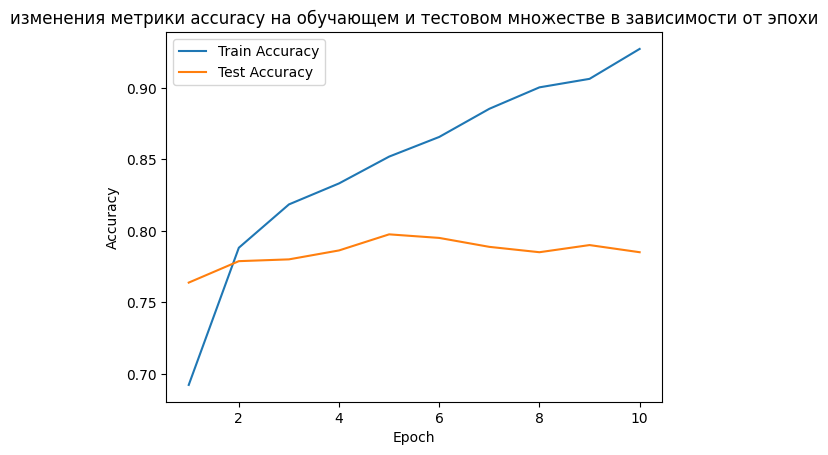

In [ ]:
# Перемещение тензоров на CPU для построения графика
train_acc_cpu = [acc.cpu().numpy() for acc in train_acc_history]
val_acc_cpu = [acc.cpu().numpy() for acc in val_acc_history]


plt.figure()
plt.plot(range(1, num_epochs + 1), train_acc_cpu, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_acc_cpu, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи')
plt.show()


In [ ]:
final_train_accuracy = train_acc_history[-1]
final_test_accuracy = val_acc_history[-1]
print(f'Final Train Accuracy: {final_train_accuracy:.4f}')
print(f'Final Test Accuracy: {final_test_accuracy:.4f}')

Final Train Accuracy: 0.9272
Final Test Accuracy: 0.7850


<p class="task" id="5"></p>

5\. Повторите решение задачи, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно.

- [ ] Проверено на семинаре

In [ ]:
from torchvision.transforms import RandomErasing, ColorJitter

In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/cat_breeds_4.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()

In [ ]:
data_way = ImageFolder('/content/cat_breeds_4')

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

test_transform = transforms.Compose([models.VGG16_Weights.IMAGENET1K_V1.transforms()])

In [ ]:
train_dataset, test_dataset = random_split(data_way, [0.75, 0.25])

In [ ]:
train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = test_transform

In [ ]:
len(train_dataset)

3000

In [ ]:
len(test_dataset)

1000

In [ ]:
ColorJitter_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [ ]:
ColorJitter_train_dataset, ColorJitter_test_dataset = random_split(data_way, [0.75, 0.25])

In [ ]:
ColorJitter_train_dataset.dataset.transform = ColorJitter_transform
ColorJitter_test_dataset.dataset.transform = test_transform

In [ ]:
RandomErasing_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [ ]:
RandomErasing_train_dataset, RandomErasing_test_dataset = random_split(data_way, [0.75, 0.25])

In [ ]:
RandomErasing_train_dataset.dataset.transform = RandomErasing_transform
RandomErasing_test_dataset.dataset.transform = RandomErasing_transform

In [ ]:
train_dataset = torch.utils.data.ConcatDataset([train_dataset, ColorJitter_train_dataset, RandomErasing_train_dataset])

In [ ]:
len(train_dataset)

9000

In [ ]:
# Замораживаем все сверточные слои, кроме classifier
for name, param in model.named_parameters():
    if "classifier" not in name:
        param.requires_grad = False

# Перемещаем модель на устройство
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Создаем оптимизатор только для параметров, у которых requires_grad=True
optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, momentum=0.9)

In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

features.0.weight False
features.0.bias False
features.2.weight False
features.2.bias False
features.5.weight False
features.5.bias False
features.7.weight False
features.7.bias False
features.10.weight False
features.10.bias False
features.12.weight False
features.12.bias False
features.14.weight False
features.14.bias False
features.17.weight False
features.17.bias False
features.19.weight False
features.19.bias False
features.21.weight False
features.21.bias False
features.24.weight False
features.24.bias False
features.26.weight False
features.26.bias False
features.28.weight False
features.28.bias False
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [ ]:
%%time
train_loss_history = []
train_acc_history = []

val_loss_history = []
val_acc_history = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} train: Loss: {epoch_loss} Acc: {epoch_acc}')


    model.eval()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = running_corrects.double() / len(test_loader.dataset)

    val_loss_history.append(epoch_loss)
    val_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} val: Loss: {epoch_loss} Acc: {epoch_acc}')

Epoch 1/10 train: Loss: 0.7561950671672821 Acc: 0.686875
Epoch 1/10 val: Loss: 0.5815221285820007 Acc: 0.76875
Epoch 2/10 train: Loss: 0.5380923920869827 Acc: 0.790625
Epoch 2/10 val: Loss: 0.5293540287017823 Acc: 0.7975
Epoch 3/10 train: Loss: 0.4636297112703323 Acc: 0.8175
Epoch 3/10 val: Loss: 0.5287817525863647 Acc: 0.7975
Epoch 4/10 train: Loss: 0.4190965947508812 Acc: 0.8359375
Epoch 4/10 val: Loss: 0.5337372469902039 Acc: 0.7975
Epoch 5/10 train: Loss: 0.3851067832112312 Acc: 0.8475
Epoch 5/10 val: Loss: 0.505485646724701 Acc: 0.80125
Epoch 6/10 train: Loss: 0.33495591074228287 Acc: 0.8703125
Epoch 6/10 val: Loss: 0.5139756298065186 Acc: 0.8
Epoch 7/10 train: Loss: 0.3103799119591713 Acc: 0.8821875
Epoch 7/10 val: Loss: 0.5200351095199585 Acc: 0.805
Epoch 8/10 train: Loss: 0.2817071035504341 Acc: 0.891875
Epoch 8/10 val: Loss: 0.5174906444549561 Acc: 0.80375
Epoch 9/10 train: Loss: 0.2475154283642769 Acc: 0.9115625
Epoch 9/10 val: Loss: 0.515112750530243 Acc: 0.805
Epoch 10/10 t

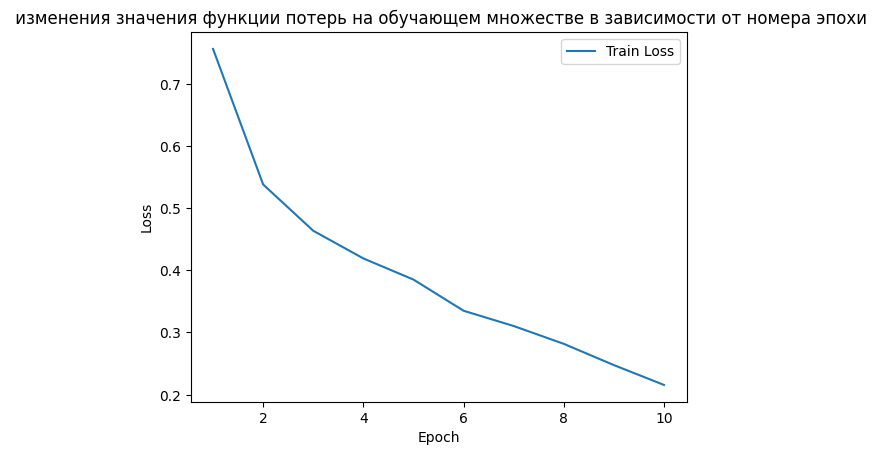

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(' изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи')
plt.show()

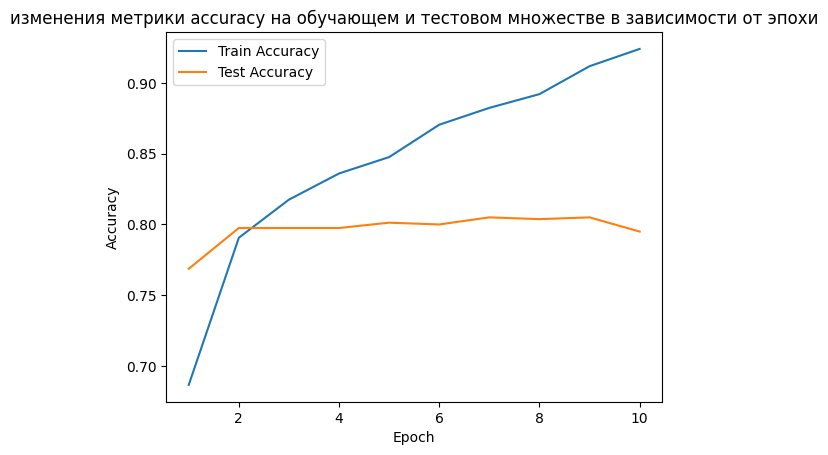

In [ ]:
# Перемещение тензоров на CPU для построения графика
train_acc_cpu = [acc.cpu().numpy() for acc in train_acc_history]
val_acc_cpu = [acc.cpu().numpy() for acc in val_acc_history]


plt.figure()
plt.plot(range(1, num_epochs + 1), train_acc_cpu, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_acc_cpu, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи')
plt.show()


In [ ]:
final_train_accuracy = train_acc_history[-1]
final_test_accuracy = val_acc_history[-1]
print(f'Final Train Accuracy: {final_train_accuracy:.4f}')
print(f'Final Test Accuracy: {final_test_accuracy:.4f}')

Final Train Accuracy: 0.9238
Final Test Accuracy: 0.7950


Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. **Оставляем так, как в 4 задании!**

## Обратная связь
- [ ] Хочу получить обратную связь по решению